# Employee Attrition Sets Us Back - Anticipating Attrition Factors
## A Case Study Using IBM's Notional HR Data

The are many outright and hidden costs to employees chosing to leave the Firm.  Whether it's the cost of recruiting, hiring, on-boarding and training another employee to replace them; the cost of lost revenue and productivity; the impact to our reputation with customers; or the setback in our goal to build out an Analytics capability which will help transform our client spaces over time - there is no question that losing talent hurts the business.

All that said - attrition at some level is a fact of life.  The questions are: How can data help us understand what drives attrition and if we understand some of the factors that help us predict an increased probality that an employee may leave the team - can we take action to keep our best performers?

### Hypothisis

A Hypothisis for this data science project is that there are one or more variables in an HR dataset which can help an organization predict the potential that an employee may to resign with a reasonable degree of confidence.

### Goals, Success Measures and Risks   

The goal for this project will be to do exploratory analysis on an HR dataset which contains some common information on employees to include if they have left the business.  This will be followed by indentification of feature variables which have a strong positive or negative relationship on employees who stay or leave.  Some initial measures of success will include the indentification of one or two variables which have a strong correlation to attrition/retention and then the ability to successfully build one or more models which can be used to predict if an employee is likely to stay or leave an organization.

There are many inherent risks and limitations in this analysis.  Some of them include the possibility that the strongest predictors for attrition are not contained in the data set or that the data has quality limitations.  It is likely that even strong predictors are by no means a guarentee that an employee may leave - and so the use of this information could have negative consequences if not handled correctly.  Another risk for the goals of this project, is that the results from this data set are not transferable to other populations of employees.  There are also the risks/limitations of the ability to consistently collect data across different organizations.

### Source and DataSet

The dataset I have chosen for this project is from Kaggle datasets, titled "IBM HR Analytics Employee Attrition & Performance: WA_Fn-UseC_-HR-Employee-Attrition.csv".  It is a fictional dataset provided by IBM data scientists and will serve as a useful exercise for this type of problem.  Perhaps the methodology and approaches in this capstone project can be applied to other employee datasets to understand if the model produces similar predictive power when tested against real population datasets.  The data does have some challenges - two in particular.  First there is a concern that the number of records is on 1.4K - not large enough for the type of modeling I'd like to do.  I can use the 'bootstrap' methodology to expand the volume of records.  The second concern is that the data set is 'fake'.  It is not clear from the description if it's based on real findings from IBM and can be extrapolated to real predictors if it is simply used to practice building HR models.  For this exercise I am assuming it is a reasonable representation of a real workforce and has been sanitized to protect any privacy and business sensitivites.

### Exploratory Data Analysis

###  

In [1]:
import pandas as pd
import numpy as np

atr = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [2]:
atr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print(atr.index)
print(atr.shape)

RangeIndex(start=0, stop=1470, step=1)
(1470, 35)


In [4]:
atr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

The dataset is looking fairly clean - values in every row and column and data types make sense on first glance

In [5]:
atr.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Some fields will clearly need to be grouped into categories.  Initial look indicates daily rate, distance from home, hourly rate, monthly income, monthly rate, total working years, years at company, years in current role, years since last promo, years with currrent manager.  Need to explore relationships to see if there are obvious logical grouping within these columns.

Some fields do not appear to have more than one unique value and could be dropped potentially (standard hours, over 18, employee count (this may be useful for sum/avg. calculations perhaps))

Also - it looks like there is potential for multicolineratity.  Some of these columns probably have direct relationships with each other (most likely years at company and years with current manager - though these have different implications, and the income/rate fields).

Will need to explore this further with visuals

In [67]:
atr.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [59]:
atr.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [23]:
atr1 = pd.get_dummies(atr,'Attrition') 

In [21]:
print(atr1.shape)

(1470, 57)


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


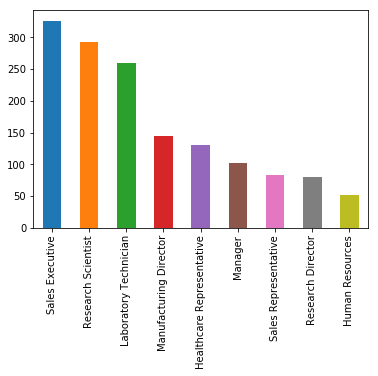

In [43]:
print(atr.JobRole.value_counts())
atr.JobRole.value_counts().plot(kind='bar'); 

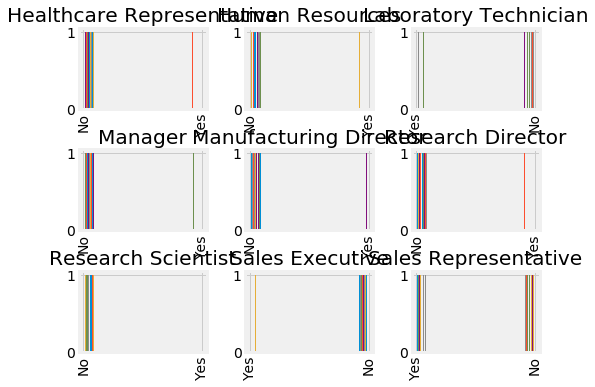

In [78]:
atr.hist(column='Attrition', by='JobRole');

In [24]:
atr1.columns

##  Not sure why get dummies did all the columns in output vs. just attrition column.  
##  Will need to convert many columns anyway.  Need help figuring this out (how to convert dataset)
##  Will need to drop the yes or no column from attrition anyway so only one column

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_No',
       'Attrition_Yes', 'Attrition_Non-Travel', 'Attrition_Travel_Frequently',
       'Attrition_Travel_Rarely', 'Attrition_Human Resources',
       'Attrition_Research & Development', 'Attrition_Sales',
       'Attrition_Human Resources', 'Attrition_Life Sciences',
       'Attrition_Marketing', 'Attrition_Medical', 'Attrition_Other',
       'Attrition_Technical Degree', 'Attrition_Female', 'Attrition_Male',
       'Attrition_Hea

In [68]:
atr1.describe(include='all')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Attrition_Research Director,Attrition_Research Scientist,Attrition_Sales Executive,Attrition_Sales Representative,Attrition_Divorced,Attrition_Married,Attrition_Single,Attrition_Y,Attrition_No,Attrition_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728,1.0,0.717007,0.282993
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.226925,0.399112,0.415578,0.230891,0.416033,0.498387,0.466530,0.0,0.450606,0.450606
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [36]:
##  Need to come back and review what visuals I can do to see the data all at once.  Not sure what is driving this error (num of columns)?

pd.plotting.scatter_matrix(atr1.drop('Attrition', axis=1), c = atr1['Attrition'],figsize=(16, 12));

KeyError: "['Attrition'] not found in axis"

In [56]:
atr.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [35]:
atr1.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Attrition_Research Director,Attrition_Research Scientist,Attrition_Sales Executive,Attrition_Sales Representative,Attrition_Divorced,Attrition_Married,Attrition_Single,Attrition_Y,Attrition_No,Attrition_Yes
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185,NaN,-0.028062,0.028062
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835,NaN,-0.009135,0.009135
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445,NaN,-0.025514,0.025514
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168,NaN,0.020322,-0.020322
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.013983,-0.017686,0.023263,0.006255,-0.025149,0.053933,-0.035189,NaN,0.024037,-0.024037
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035,NaN,-0.070132,0.070132
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,-0.025128,0.020034,-0.011886,-0.018703,-0.006150,0.036432,-0.033436,NaN,0.007782,-0.007782
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.015200,0.047604,-0.011413,-0.027282,0.016815,0.028324,-0.045253,NaN,0.003507,-0.003507
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.414319,-0.387788,0.127490,-0.216559,0.037087,0.050547,-0.087072,NaN,-0.000544,0.000544


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [55]:
sns.pairplot(atr1.drop('Attrition_No', axis=1), hue="Attrition_Yes", size=3)

ValueError: could not broadcast input array from shape (1470,2) into shape (1470)

C:\Users\029165\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


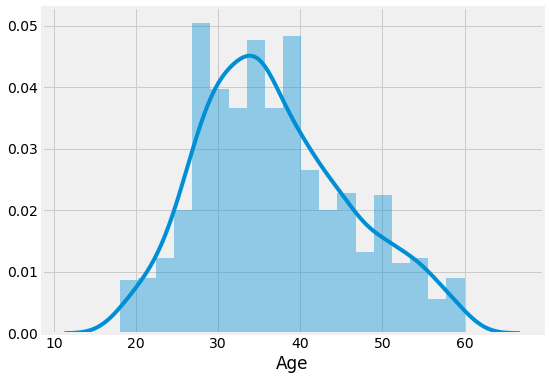

In [65]:
sns.distplot(atr1['Age']);
#sns.distplot(atr1['JobSatisfaction'])

In [ ]:
#atr1.plot(kind='scatter', x='Attrition_Yes', y='', c='Attrition_Yes', colormap='brg');

In [69]:
feature_cols = ['Age', 'JobInvolvement', 'WorkLifeBalance', 'PerformanceRating', 'MonthlyIncome', 'PercentSalaryHike','MaritalStatus']

ValueError: x and y must be the same size

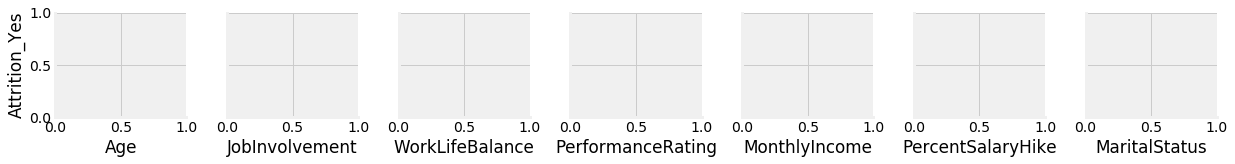

In [72]:
sns.pairplot(atr1, x_vars=feature_cols, y_vars= 'Attrition_Yes', kind='reg');